2025-06-30 11:24:50.292914: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-06-30 11:24:50.331501: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-06-30 11:24:50.343356: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-06-30 11:24:50.369944: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-06-30 11:24:52.592851: W tensorflow/comp

result1: [{'Top1_Acc_MB/train_phase/train_stream/Task000': 1.0, 'Loss_MB/train_phase/train_stream/Task000': 0.04077183082699776, 'RunningTime_Epoch/train_phase/train_stream/Task000': 1.4499360521254288e-05, 'DiskUsage_MB/train_phase/train_stream/Task000': 2231.6201171875, 'Top1_Acc_Epoch/train_phase/train_stream/Task000': 0.9688775510204082, 'Loss_Epoch/train_phase/train_stream/Task000': 0.12556073219842584, 'Time_Epoch/train_phase/train_stream/Task000': 560.135143795982, 'DiskUsage_Epoch/train_phase/train_stream/Task000': 2231.6201171875, 'Top1_Acc_Exp/eval_phase/test_stream/Task000/Exp000': 0.9747422680412371, 'Loss_Exp/eval_phase/test_stream/Task000/Exp000': 0.10986194073736545, 'CPUUsage_Exp/eval_phase/test_stream/Task000/Exp000': 1146.8504643359013, 'DiskUsage_Exp/eval_phase/test_stream/Task000/Exp000': 2231.6201171875, 'Top1_Acc_Exp/eval_phase/test_stream/Task000/Exp001': 0.0, 'Loss_Exp/eval_phase/test_stream/Task000/Exp001': 23.30306140299376, 'CPUUsage_Exp/eval_phase/test_strea

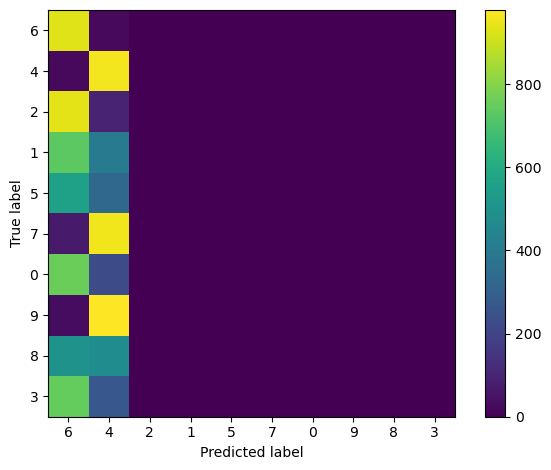

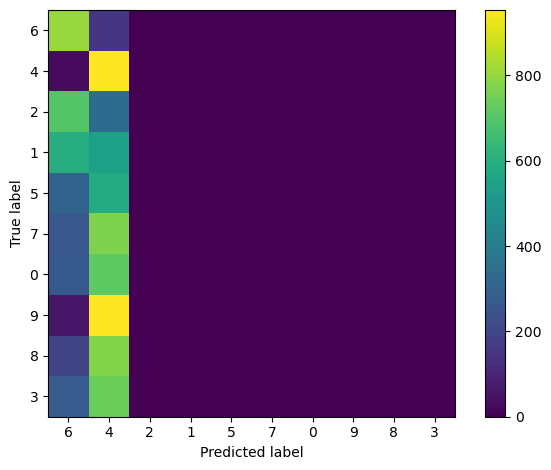

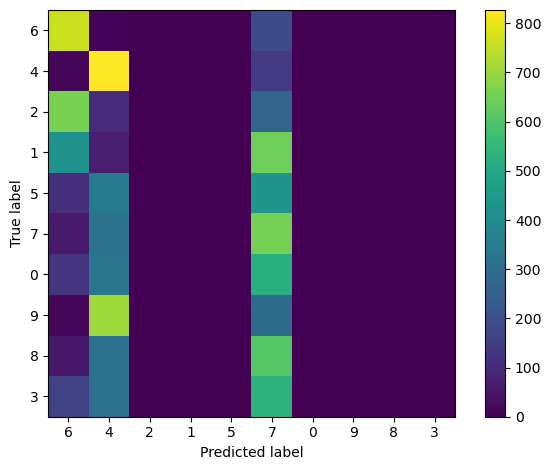

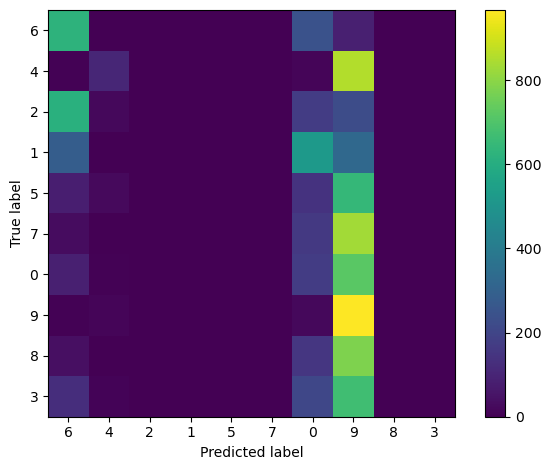

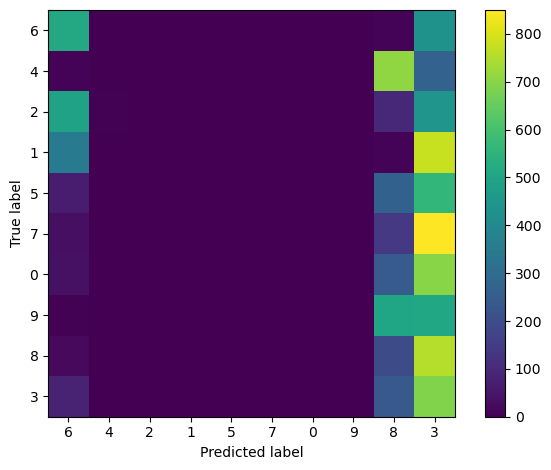

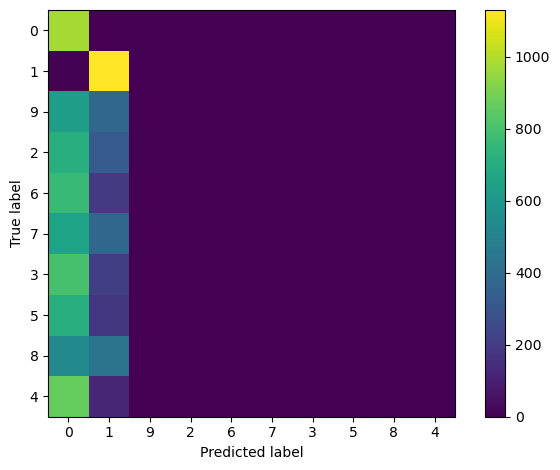

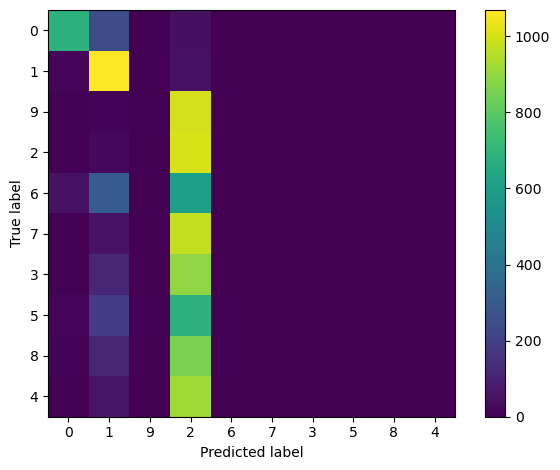

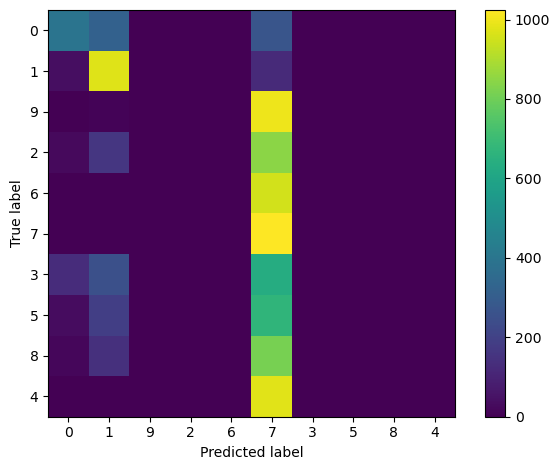

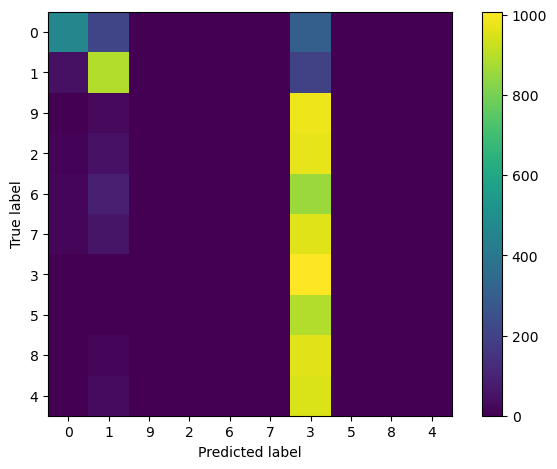

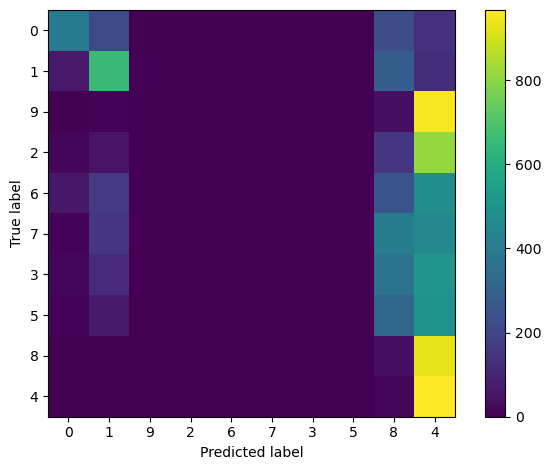

In [1]:
import pickle

def load_pickle(file_path):
    """
    Load a pickle file and return the object contained within it.

    :param file_path: Path to the pickle file.
    :return: The object loaded from the pickle file.
    """
    try:
        with open(file_path, 'rb') as file:
            return pickle.load(file)
    except Exception as e:
        print(f"Error loading pickle file: {e}")
        return None
    
file_1 = '/home/yangz2/code/quantum_cl/results/list/splitminist_ER_qbit10_qdepth1.pkl'
file_2 = '/home/yangz2/code/quantum_cl/results/list/splitmnist_er_s2_qbit10_qdepth4_tepoch20.pkl'
file_3 = '/home/yangz2/code/quantum_cl/results/list/splitmnist_er_ours_3_qbit10_qdepth3_tepoch20.pkl'
file_4 = '/home/yangz2/code/quantum_cl/results/list/splitmnist_ER_cnn_final.pkl'

result1 = load_pickle(file_1)[0]
result2 = load_pickle(file_2)
result3 = load_pickle(file_3)
result4 = load_pickle(file_4)
print('result1:', result1)
print('result2:', result2)
print('result3:', result3)
print('result4:', result4)


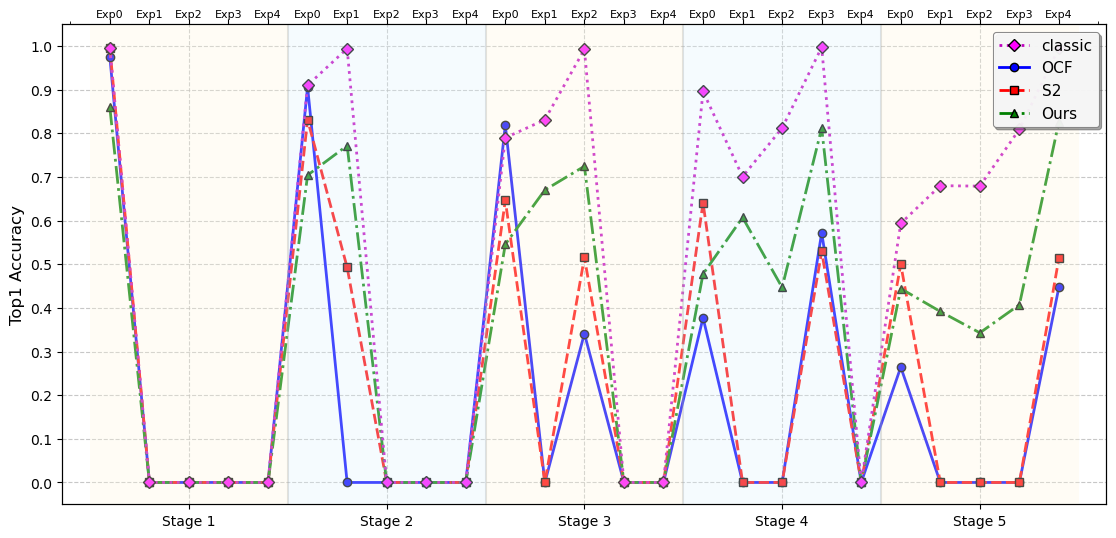

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MultipleLocator

num_exp = 5
# 准备数据提取函数
def extract_exp_accuracies(result_list):
    """从结果列表中提取所有Exp的Top1准确率，按训练阶段组织"""
    num_stages = len(result_list)
    all_accs = []  # 存储所有阶段的准确率
    
    for stage_idx, stage_data in enumerate(result_list):
        stage_accs = []
        for exp_idx in range(num_exp):  # 提取5个Exp的准确率
            key = f'Top1_Acc_Exp/eval_phase/test_stream/Task000/Exp00{exp_idx}'
            if key in stage_data:
                stage_accs.append(stage_data[key])
            else:
                # 如果键不存在，使用上一个阶段的值或0
                prev_value = all_accs[-1][exp_idx] if all_accs and len(all_accs[-1]) > exp_idx else 0
                stage_accs.append(prev_value)
        all_accs.append(stage_accs)
    
    return all_accs

# 从三个结果中提取数据
result1_accs = extract_exp_accuracies(result1)
result2_accs = extract_exp_accuracies(result2)
result3_accs = extract_exp_accuracies(result3)
result4_accs = extract_exp_accuracies(result4)

# 创建图表 - 调整大小和留白
plt.figure(figsize=(12, 6))
plt.ylabel('Top1 Accuracy', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# 将数据展平为一维数组
result1_flat = [acc for stage in result1_accs for acc in stage]
result2_flat = [acc for stage in result2_accs for acc in stage]
result3_flat = [acc for stage in result3_accs for acc in stage]
result4_flat = [acc for stage in result4_accs for acc in stage]

# 绘制三条折线 - 使用不同的线型和标记
x = np.arange(len(result1_flat))
line1, = plt.plot(x, result1_flat, 'b-', linewidth=2, marker='o', markersize=6, 
                 markerfacecolor='blue', markeredgecolor='black')
line2, = plt.plot(x, result2_flat, 'r--', linewidth=2, marker='s', markersize=6, 
                 markerfacecolor='red', markeredgecolor='black')
line3, = plt.plot(x, result3_flat, 'g-.', linewidth=2, marker='^', markersize=6, 
                 markerfacecolor='green', markeredgecolor='black')
line4, = plt.plot(x, result4_flat, 'm:', linewidth=2, marker='D', markersize=6, 
                 markerfacecolor='magenta', markeredgecolor='black')

# 添加阶段分隔线
for stage in range(1, len(result1)):
    plt.axvline(x=stage*num_exp-0.5, color='gray', linestyle='-', alpha=0.3, linewidth=1.5)

# 设置Y轴
plt.yticks(np.arange(0, 1.1, 0.1), fontsize=10)
plt.ylim(-0.05, 1.05)

# 创建双X轴显示
ax = plt.gca()

# 上方X轴：显示Exp标签
ax_top = ax.twiny()
ax_top.set_xlim(ax.get_xlim())
ax_top.set_xticks(x)
ax_top.set_xticklabels([f'Exp{exp}' for exp in range(num_exp)] * len(result1), fontsize=8)
ax_top.tick_params(axis='x', which='major', labelsize=8, pad=0)
ax_top.xaxis.set_minor_locator(MultipleLocator(1))

# 下方X轴：显示Stage标签
ax.set_xticks([i*num_exp + num_exp/2 - 0.5 for i in range(len(result1))])
ax.set_xticklabels([f'Stage {i+1}' for i in range(len(result1))], fontsize=10)

# 添加网格线和背景色以区分阶段
for stage in range(len(result1)):
    start = stage * num_exp
    end = (stage + 1) * num_exp
    color = '#FFF8E1' if stage % 2 == 0 else '#E1F5FE'  # 更柔和的颜色
    plt.axvspan(start-0.5, end-0.5, facecolor=color, alpha=0.3)

# 在右上角添加卡片式图例
legend = plt.legend(
    [line4, line1, line2, line3],
    ['classic', 'OCF', 'S2', 'Ours'],
    loc='upper right',
    fontsize=11,
    frameon=True,
    fancybox=True,
    framealpha=0.9,
    edgecolor='gray',
    shadow=True
)
legend.get_frame().set_linewidth(0.8)  # 设置边框线宽

# 调整布局 - 减少留白
plt.tight_layout(pad=1.0)  # 减少内边距
plt.subplots_adjust(
    top=0.95,    # 减少顶部留白
    bottom=0.15, # 减少底部留白
    left=0.08,   # 减少左侧留白
    right=0.95   # 减少右侧留白
)

plt.show()